In [150]:
import pandas as pd 
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import  train_test_split
import glob

In [151]:
data = pd.read_csv('10sec_avg_200files_ph5_train.csv')

In [152]:
# path =r'F:/DEC29/Udemy/CODE/DataAVG4/Test1/' # use your path
# allFiles = glob.glob(path + "/*.csv")
# test_data = pd.DataFrame()
# list_ = []
# for file_ in allFiles:
#     df = pd.read_csv(file_,index_col=None, header=0)
#     list_.append(df)
# test_data = pd.concat(list_)
# print(test_data.shape)

In [153]:
# test_data.to_csv('DataAVG4_Test3.csv',index=False,header=True)

In [154]:
test_data = pd.read_csv('DataAVG3_Test1.csv')

In [155]:
test_data = test_data.loc[test_data['PH']==5]

In [156]:
data['New_feature_6'] = data.apply(lambda row: abs((row['TAS_Mean']*row['TAS_Mean'])+(row['VSPS']*row['VSPS'])), axis=1)
data['New_feature_5'] = data.apply(lambda row: row['WS_Mean']+row['WS_Mean']*math.tan(math.radians(row['WD_Mean'])), axis=1)
data['New_feature_8'] = data.apply(lambda row: row['WS_Mean']-row['WS_Mean']*math.tan(math.radians(row['WD_Mean'])), axis=1)
data['New_feature_4'] = data.apply(lambda row: row['WS_Mean']+row['WD_Mean'], axis=1)
data['New_feature_1'] = data.apply(lambda row: row['GS_Mean']/math.cos(math.radians(row['WD_Mean'])), axis=1)
data['New_feature_3'] = data.apply(lambda row: ((row['GS_Mean']-row['CAS_Mean'])), axis=1)
data['New_feature_2'] = data.apply(lambda row: math.tan(math.radians(row['WD_Mean']))*row['VIB_1_Mean'], axis=1)
data['New_feature'] = data.apply(lambda row: row['N1T_Mean']/row['TAS_Mean'], axis=1)

In [157]:
test_data['New_feature_6'] = test_data.apply(lambda row: abs((row['TAS_Mean']*row['TAS_Mean'])+(row['VSPS']*row['VSPS'])), axis=1)
test_data['New_feature_5'] = test_data.apply(lambda row: row['WS_Mean']+row['WS_Mean']*math.tan(math.radians(row['WD_Mean'])), axis=1)
test_data['New_feature_8'] = test_data.apply(lambda row: row['WS_Mean']-row['WS_Mean']*math.tan(math.radians(row['WD_Mean'])), axis=1)
test_data['New_feature_4'] = test_data.apply(lambda row: row['WS_Mean']+row['WD_Mean'], axis=1)
test_data['New_feature_1'] = test_data.apply(lambda row: row['GS_Mean']/math.cos(math.radians(row['WD_Mean'])), axis=1)
test_data['New_feature_3'] = test_data.apply(lambda row: ((row['GS_Mean']-row['CAS_Mean'])), axis=1)
test_data['New_feature_2'] = test_data.apply(lambda row: math.tan(math.radians(row['WD_Mean']))*row['VIB_1_Mean'], axis=1)
test_data['New_feature'] = test_data.apply(lambda row: row['N1T_Mean']/row['TAS_Mean'], axis=1)

In [158]:
columns=['PH',\
         'FQTY_1',\
         'PTRM','SAT','VMODE','VSPS',\
         'RUDP_Mean','ALT_Mean','ALTR_Mean',\
         'CAS_Mean','N1T_Mean','TAS_Mean','WS_Mean','GS_Mean',\
         'TRK_Mean','WD_Mean','VIB_1_Mean','ROLL_Mean',\
         'FF','New_feature','New_feature_1','New_feature_3','New_feature_5','New_feature_4']
print(len(columns))

24


In [159]:
train1=data[columns]
test1=test_data[columns]

In [160]:
train = train1.loc[train1['PH']==5]
test = test1.loc[test1['PH']==5]

In [161]:
# print(test.shape)
# test = test.groupby(lambda x:x//2).mean()
# train = train.groupby(lambda x:x//2).mean()
# print(test.shape)
# print(train.shape)

In [162]:
y_train=train.loc[:,['FF']]
X_train=train.drop(['FF','PH'],axis=1)
y_test=test.loc[:,'FF']
X_test=test.drop(['FF','PH'],axis=1)

In [163]:
#Standardizing the variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)

In [164]:
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [165]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# parameters={'n_estimators':[500,1000,1500,2000,2500],
# 'learning_rate':[0.001,0.01,0.1,1],'max_depth':[5,6,7,8],
#           'subsample':[0.2,0.5,0.8],'reg_lambda':[0.5,0.6,0.8]}

# model_xgboost=GridSearchCV(XGBRegressor(),parameters)
model_xgboost=XGBRegressor(n_estimators=1000,learning_rate=0.3,\
                           subsample=.9,reg_lambda=0.4,max_depth = 7,gamma = 9,min_child_weight = 2,colsample_bytree = 1)
regr=model_xgboost.fit(X_train,y_train)

predict_train=regr.predict(X_train)

In [166]:
predict_test=regr.predict(X_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error
print("train absolute error is",mean_absolute_error(np.array(y_train),predict_train))

print("test absolute error is",mean_absolute_error(np.array(y_test),predict_test))
print("train mean squared error is",np.sqrt(mean_squared_error(np.array(y_train),predict_train)))

print("test root mean squared error is",np.sqrt(mean_squared_error(np.array(y_test),predict_test)))

print("Mean Absolute Percentage Error: ", (np.mean(np.abs(y_test - predict_test) / y_test) * 100))

train absolute error is 2.15229373297
test absolute error is 116.008630189
train mean squared error is 2.86374665808
test root mean squared error is 179.361688465
Mean Absolute Percentage Error:  2.4151262093925228


In [167]:
output =predict_test
outputdataframe=pd.DataFrame(output)

outputdataframe.to_csv('output1.csv', index=False, header=True)

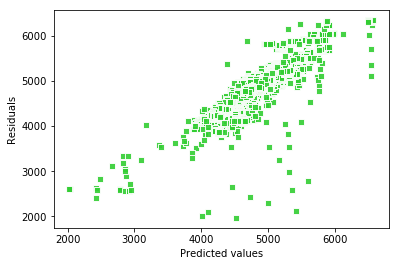

In [131]:
plt.scatter(predict_test,  
             y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='test data')
# plt.scatter(predict_train,  
#             predict_train - y_train, 
#             c='steelblue',
#             edgecolor='white',
#             marker='o', 
#             s=35,
#             alpha=0.9,
#             label='training data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

In [110]:
# from sklearn.ensemble import RandomForestClassifier

# feat_labels = X_train.columns[1:]

# forest = RandomForestClassifier(n_estimators=25,
#                                 random_state=1)

In [111]:
# y_train = y_train.astype('int')

In [112]:
# forest.fit(X_train, y_train)

C:\Users\MKS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [113]:
# importances = forest.feature_importances_
# indices = np.argsort(importances)[::-1]
# # for f in range(X_train.shape[1]):
# #     print("%2d) %-*s %f" % (f + 1, 41, 
# #                             feat_labels[indices[f]], 
# #                             importances[indices[f]]))

# for f in indices:
#     print(X_train.iloc[:,f].name)
    
# # plt.title('Feature Importance')
# # plt.bar(range(X_train.shape[1]), 
# #         importances[indices],
# #         align='center')

# # plt.xticks(range(X_train.shape[1]), 
# #            feat_labels[indices], rotation=90)
# # plt.xlim([-1, X_train.shape[1]])
# # plt.tight_layout()
# # #plt.savefig('images/04_09.png', dpi=300)
# # plt.show()
# indices

N1T_Mean
CAS_Mean
TRK_Mean
ROLL_Mean
New_feature
ALTR_Mean
ALT_Mean
RUDP_Mean
New_feature_4
FQTY_1
WS_Mean
WD_Mean
GS_Mean
TAS_Mean
PTRM
New_feature_3
SAT
New_feature_1
New_feature_5
VIB_1_Mean
VSPS
VMODE


array([ 9,  8, 13, 16, 17,  7,  6,  5, 21,  0, 11, 14, 12, 10,  1, 19,  2,
       18, 20, 15,  4,  3], dtype=int64)